In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import seaborn as sns
import numpy as np
import os

In [5]:
#Set the font to latex font
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#Set the color scheme for  base model:  #00876C
#Set the color scheme for the ransomware attack: #4664AA

#Set the color scheme for the base model
baseColor = '#079EDE' #Color from KIT guidelines
ransomwareColor = '#A22223' #Color from KIT guidelines
thirdColor = '#00876C' #Color from KIT guidelines

pathBaseModel = '/Users/Jeremy/Models/HospitalMaster/Files/BaseModel/'
pathRansomware = '/Users/Jeremy/Models/HospitalMaster/Files/RansomwareAttack/FullDepartmentAttack/'
pathMainFolder = '/Users/Jeremy/Models/HospitalMaster/Files/'

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Jeremy/Models/HospitalMaster/Files//Plots/LineGraphs/RecoveryFunction/ContRecoveryFunction.svg'

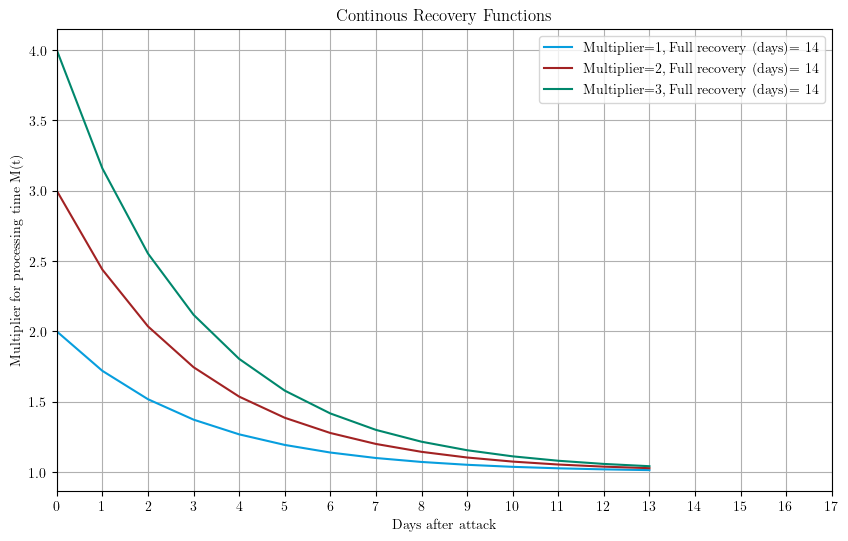

In [6]:
############################################################################################################
# Plot the data of the decreasing exponential recovery function
############################################################################################################

import numpy as np
import matplotlib.pyplot as plt

def recoveryFunction(startMultiplier, delay, daysFullRecovery, targetPercentage=1.01):
    """
    Generates a decreasing exponential recovery function.
    
    Parameters:
    startMultiplier (float): The initial multiplier value.
    delay (int): The delay in days before the recovery starts.
    daysFullRecovery (int): The number of days to reach full recovery.
    targetPercentage (float): The target percentage to be reached at full recovery.
    
    Returns:
    np.ndarray: Array of recovery values.
    """
    # Generate the days array
    days = np.arange(0, daysFullRecovery)
    
    # Calculate Tau
    tau = 1 / np.log(targetPercentage - 1) * daysFullRecovery
    
    # Calculate the recovery values
    recovery_values = startMultiplier * np.exp((days) / tau) + 1

    
    return days, recovery_values

# Example usage and plotting
plt.figure(figsize=(10, 6))

# Generate and plot multiple recovery functions
startMultipliers = [1, 2, 3]
delays = [1, 2, 3]
daysFullRecoverys = [14,14,14]

# Define colors for each plot
colors = [baseColor, ransomwareColor, thirdColor]

for i in range(len(startMultipliers)):
    startMultiplier = startMultipliers[i]
    delay = delays[i]
    daysFullRecovery = daysFullRecoverys[i]
    days, recovery_values = recoveryFunction(startMultiplier, delay, daysFullRecovery)
    plt.plot(days, recovery_values, label=fr'Multiplier={startMultiplier}, Full recovery (days)= {daysFullRecovery}', color=colors[i % len(colors)])

# Set x-axis limits
plt.xlim(0, 17)

# Add legend, title, and labels
plt.legend()
plt.title('Continous Recovery Functions')
plt.xlabel('Days after attack')
plt.ylabel('Multiplier for processing time M(t)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.savefig(pathMainFolder + '/Plots/LineGraphs/RecoveryFunction/ContRecoveryFunction.svg', format='svg', bbox_inches='tight',  dpi=1200)

# Show the plot
plt.show()

# Create the step function plot
plt.figure(figsize=(10, 6))

for i in range(len(startMultipliers)):
    startMultiplier = startMultipliers[i]
    delay = delays[i]
    daysFullRecovery = daysFullRecoverys[i]
    days, recovery_values = recoveryFunction(startMultiplier, delay, daysFullRecovery)
    display(recovery_values[3])
    display(recovery_values[7])
    plt.step(days, recovery_values, label=fr'Multiplier={startMultiplier}, Full recovery (days)= {daysFullRecovery}', color=colors[i % len(colors)], where='mid')

# Set x-axis limits
plt.xlim(0, 17)

# Add legend, title, and labels
plt.legend()
plt.title('Step Recovery Functions (Simulation)')
plt.xlabel('Days after attack')
plt.ylabel('Multiplier for processing time M(t)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.savefig(pathMainFolder + '/Plots/LineGraphs/RecoveryFunction/StepRecoveryFunction.svg', format='svg', bbox_inches='tight',  dpi=1200)

# Show the plot
plt.show()


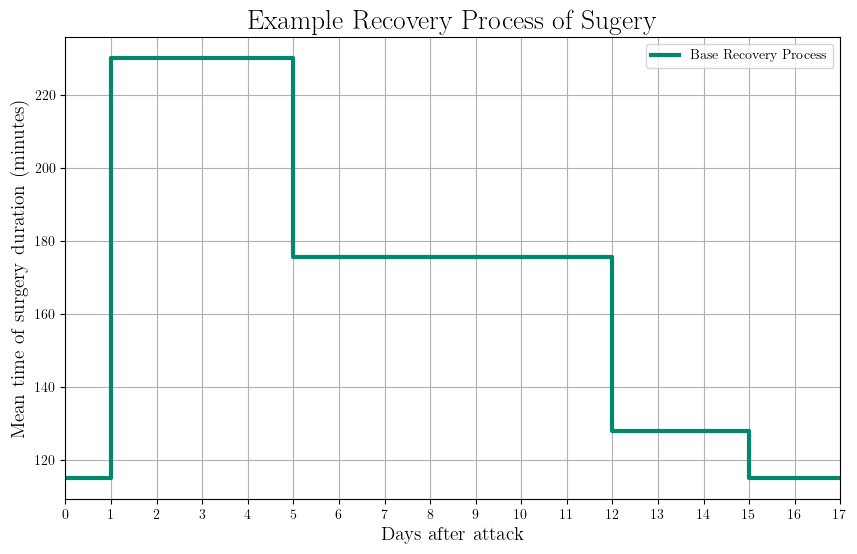

In [7]:
def recoveryFunction(startMultiplier, delay, daysFullRecovery, targetPercentage=1.01):
    """
    Generates a decreasing exponential recovery function.
    
    Parameters:
    startMultiplier (float): The initial multiplier value.
    delay (int): The delay in days before the recovery starts.
    daysFullRecovery (int): The number of days to reach full recovery.
    targetPercentage (float): The target percentage to be reached at full recovery.
    
    Returns:
    np.ndarray: Array of recovery values.
    """
    # Generate the days array
    days = np.arange(0, daysFullRecovery)
    
    # Calculate Tau
    tau = 1 / np.log(targetPercentage - 1) * daysFullRecovery
    
    # Calculate the recovery values
    recovery_values = startMultiplier * np.exp((days) / tau) + 1

    
    return days, recovery_values



# Example usage and plotting
plt.figure(figsize=(10, 6))

# Define colors for each plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Manually specify the steps
x_values = [0, 1, 2, 5, 12, 15, 17]
y_values = [115, 230, 230, 175.5,128, 115, 115]

# Manually specify the steps for the second plot
x_values2 = [0, 1, 2, 5, 12, 15, 17]
y_values2 = [115, 460, 460, 351, 256, 115, 115]

# Plot the step function
plt.step(x_values, y_values, label='Base Recovery Process ', color=thirdColor, where='post',linewidth=3)
#plt.step(x_values2, y_values2, label='Alternative Recovery Process', color=colors[1], where='post', linewidth=3)

# Set x-axis limits
plt.xlim(0, 17)

# Add legend, title, and labels
plt.legend()
plt.title('Example Recovery Process of Sugery', fontsize=20)
plt.xlabel('Days after attack', fontsize=14)
plt.ylabel('Mean time of surgery duration (minutes)', fontsize=14)
plt.grid(True)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

#plt.savefig(pathMainFolder + '/Plots/LineGraphs/RecoveryFunction/StepRecoveryFunctionSurgery.svg', format='svg', bbox_inches='tight',  dpi=1200)


# Show the plot
plt.show()

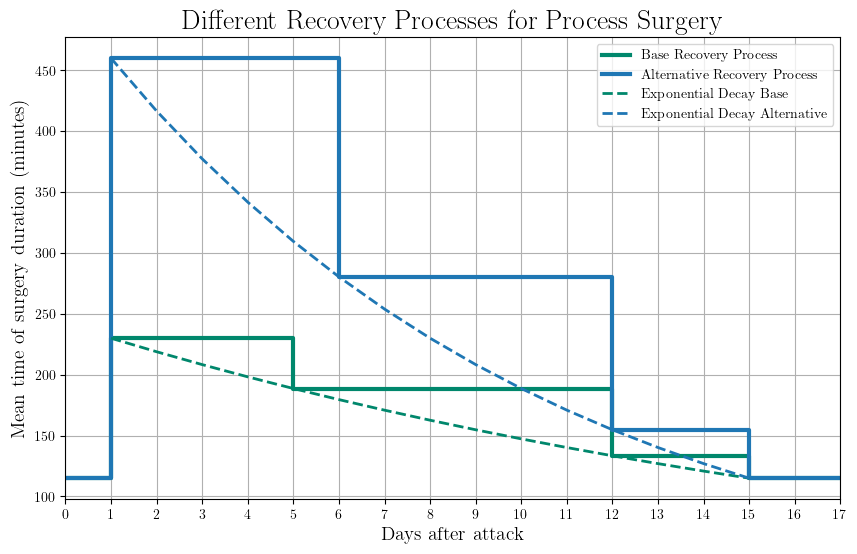

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_decay(start_value, end_value, start_day, end_day):
    """
    Generates an exponential decay function.
    
    Parameters:
    start_value (float): The initial value.
    end_value (float): The value to decay to.
    start_day (int): The day when the decay starts.
    end_day (int): The day when the end value is reached.
    
    Returns:
    np.ndarray: Array of days.
    np.ndarray: Array of decay values.
    """
    # Generate the days array
    days = np.arange(start_day, end_day + 1)
    
    # Calculate the decay constant
    tau = (end_day - start_day) / np.log(start_value / end_value)
    
    # Calculate the decay values
    decay_values = start_value * np.exp(-(days - start_day) / tau)
    
    return days, decay_values

# Manually specify the steps
x_values = [0, 1, 5, 12, 15, 17]
y_values = [115, 230, 175.5, 128, 115, 115]

# Alternative recovery with 2 countermeasures
x_values2 = [0, 1, 6, 12, 15, 17]  # Adjusted time points
y_values2 = [115, 460, 300, 180, 115, 115]  # Adjusted values for smooth transitions

# Parameters for the exponential decay functions
start_value1 = y_values[1]
end_value1 = y_values[-2]
start_day1 = x_values[1]
end_day1 = x_values[-2]

start_value2 = y_values2[1]
end_value2 = y_values2[-2]
start_day2 = x_values2[1]
end_day2 = x_values2[-2]

# Get the decay values for the first plot
decay_days1, decay_values1 = exponential_decay(start_value1, end_value1, start_day1, end_day1)

# Get the decay values for the second plot
decay_days2, decay_values2 = exponential_decay(start_value2, end_value2, start_day2, end_day2)

# Define the step function values using the decay function for the given x-values
y_values = [115] + [decay_values1[np.where(decay_days1 == day)][0] if day in decay_days1 else y_values[i] for i, day in enumerate(x_values[1:])]
y_values2 = [115] + [decay_values2[np.where(decay_days2 == day)][0] if day in decay_days2 else y_values2[i] for i, day in enumerate(x_values2[1:])]

# Example usage and plotting
plt.figure(figsize=(10, 6))

# Define colors for each plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the step function for the base recovery process
plt.step(x_values, y_values, label='Base Recovery Process', color=thirdColor, where='post', linewidth=3)

# Plot the step function for the alternative recovery process
plt.step(x_values2, y_values2, label='Alternative Recovery Process', color=colors[0], where='post', linewidth=3)

# Plot the exponential decay function for the base recovery process
plt.plot(decay_days1, decay_values1, label='Exponential Decay Base', color=thirdColor, linestyle='--', linewidth=2)

# Plot the exponential decay function for the alternative recovery process
plt.plot(decay_days2, decay_values2, label='Exponential Decay Alternative', color=colors[0], linestyle='--', linewidth=2)

# Set x-axis limits
plt.xlim(0, 17)

# Add legend, title, and labels
plt.legend()
plt.title('Different Recovery Processes for Process Surgery', fontsize=20)
plt.xlabel('Days after attack', fontsize=14)
plt.ylabel('Mean time of surgery duration (minutes)', fontsize=14)
plt.grid(True)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.savefig('RecoveryPlots/RecoveryFunctionSurgery.pdf', format='pdf', bbox_inches='tight',  dpi=1200)

# Show the plot
plt.show()